# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Chua, Winonna Kylie\
_Student No._: 2022-09120\
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: October 19, 2024 | 3:45

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Winonna Kylie C. Chua**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: <font color='red'>**100/100**</font>

Score breakdown:
* Problem 1 - <font color='red'>**30/30**</font>
* Problem 2 - <font color='red'>**70/70**</font>

<font color='red'>**signed GC Belinario**</font>

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


Since the length of the Fourier coefficients for y_1 and y_2 being equal is found to be True, we conclude that both produce 501 coefficients.

From y_1, we obtain the following plot:


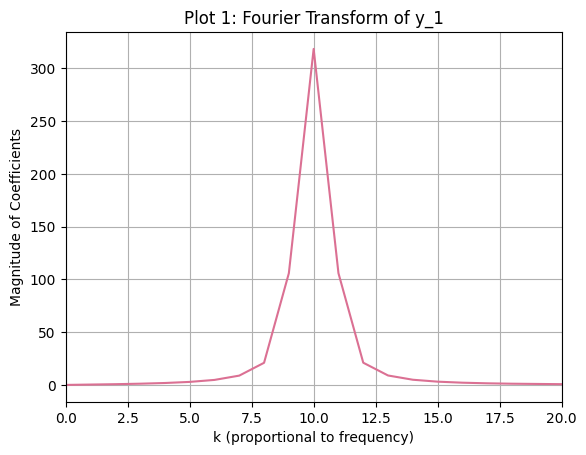

<Figure size 1500x1200 with 0 Axes>

Explanation of Plot 1:
This plot is incorrect since its range only accounts for one half of the period (0 -> 1000), thus producing one peak when there are supposed to be two peaks. 
I also observed that when k ranges from 0 to 10, the amplitude increases and exceeds 300. When k is approximately 10, the plot reaches its highest amplitude (peak). 
When k ranges from 10 to 20, the amplitude decreases and approximately approaches 0.

From y_2, we obtain the following plot:


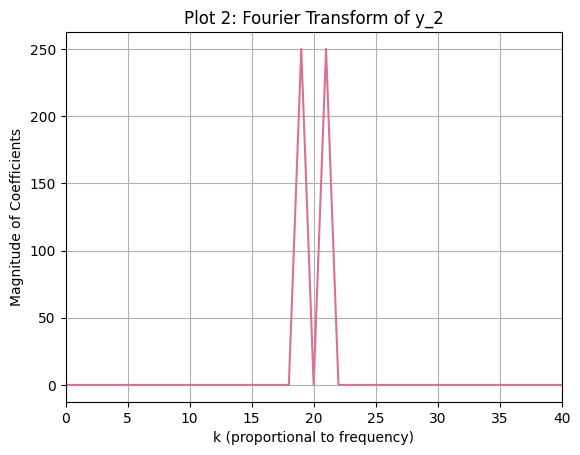

<Figure size 1500x1200 with 0 Axes>

Explanation of Plot 2:
This plot is correct since its range accounts for the whole period (0 -> 2000), thus producing two peaks. The plot has two maxima (amplitude is approximately 250) 
at the k value intervals (15, 20) and (20, 25). Before the first peak, the amplitude is initially around 0 and then it rapidly increases. After the first peak, 
the amplitude decreases and approximately becomes 0 when k is around 20. After this, the amplitude increases once again and produces the second peak. After the 
second peak, the amplitude decreases and approximately becomes 0.


In [119]:
from math import sin
from numpy import zeros, abs
from cmath import exp, pi
from pylab import xlim
import matplotlib.pyplot as plt

#1:
def y(n, N): # defining y as the function of the modulated sine wave
  return sin((pi*n)/N)*sin((20*pi*n)/N)

def dft(y): # defining the function for dft as dft(y) with y as the samples
  N = len(y) # assigning N to have the length of y
  c = zeros(N//2+1, complex) # assigning c to be an array of zeros with size = N//2+1 to store the complex Fourier coefficients
  for k in range(N//2+1): # the coefficients will be solved for when k is in the interval [0, N//2]
                          # note: we only solve for N//2+1 coefficients since N is even, the other half of the coefficients will be the complex conjugates
    for n in range(N):
      c[k] += y[n]*exp(-2j*pi*k*n/N) # formula for discrete Fourier transform
  return c

N = 1000 # number of evenly spaced points
y_1 = [y(n, N) for n in range(0, N, 1)] # defined function y_1 ranges from 0 to 1000 with a step size of 1
c_1 = dft(y_1) # coefficients in the discrete Fourier transform of function y_1

y_2 = [y(n, N) for n in range(0, 2*N, 2)] # defined function y_2 ranges from 0 to 2000 with a step size of 2
c_2 = dft(y_2) # coefficients in the discrete Fourier transform of function y_2

print(f"Since the length of the Fourier coefficients for y_1 and y_2 being equal is found to be {len(c_1) == len(c_2)}, we conclude that both produce {len(c_1)} coefficients.")
print("")

#2:
print("From y_1, we obtain the following plot:")
plt.plot(abs(c_1), color = "palevioletred") # plots the absolute value of c_1
xlim(0, 20) # x-axis ranges from 0 to 20
plt.title("Plot 1: Fourier Transform of y_1") # plot title
plt.xlabel("k (proportional to frequency)") # label for x-axis
plt.ylabel("Magnitude of Coefficients") # label for y-axis
plt.grid() # adds grids in the plot
plt.figure(figsize=(15, 12)) # increases the size of the figure
plt.show() # displays plot
print("Explanation of Plot 1:")
print("This plot is incorrect since its range only accounts for one half of the period (0 -> 1000), thus producing one peak when there are supposed to be two peaks. \nI also observed that when k ranges from 0 to 10, the amplitude increases and exceeds 300. When k is approximately 10, the plot reaches its highest amplitude (peak). \nWhen k ranges from 10 to 20, the amplitude decreases and approximately approaches 0.")
print("")
print("From y_2, we obtain the following plot:")
plt.plot(abs(c_2), color = "palevioletred") # plots the absolute value of c_2
xlim(0, 40) # x-axis ranges from 0 to 40
plt.title("Plot 2: Fourier Transform of y_2") # plot title
plt.xlabel("k (proportional to frequency)") # label for x-axis
plt.ylabel("Magnitude of Coefficients") # label for y-axis
plt.grid() # adds grids in the plot
plt.figure(figsize=(15, 12)) # increases the size of the figure
plt.show() # displays plot
print("Explanation of Plot 2:")
print("This plot is correct since its range accounts for the whole period (0 -> 2000), thus producing two peaks. The plot has two maxima (amplitude is approximately 250) \nat the k value intervals (15, 20) and (20, 25). Before the first peak, the amplitude is initially around 0 and then it rapidly increases. After the first peak, \nthe amplitude decreases and approximately becomes 0 when k is around 20. After this, the amplitude increases once again and produces the second peak. After the \nsecond peak, the amplitude decreases and approximately becomes 0.")

<font color=red>Correctness of Code: 15/15</font> \
<font color=red>Discussion of Code and Results: 15/15 </font>

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive/

 0409292v1.pdf
'Affidavit of Loss of RFID.gdoc'
'Applied Physics 155'
'Arts 1_Module 3 - Making Meaning.gdoc'
 BSPhysics_curriculum_post.pdf
'Chapter 1 Notes.pdf'
'[Chua] - [Form 5].PNG'
'[Chua] - ORCR1.pdf'
'[Chua] - [UP ID].pdf'
'Chua, Winonna_Day In the Life Vlog.mp4'
'ChuaWinonna_Physics 131 Notebook#1.pdf'
 ChuaWinonna_Reflection.gdoc
 Classical-Dynamics-of-Particles-and-Systems.pdf
 Classroom
'Colab Notebooks'
'Copy of UNIV PHYSICS WITH MODERN PHYSICS. YOUNG & FREEDMAN.pdf'
'CRS Grades_Chua, Winonna Kylie.pdf'
'Curriculum Vitae_Chua, Winonna Kylie.gdoc'
'Curriculum Vitae_Chua, Winonna Kylie.pdf'
'CWTS M7 Group 1'
'[First Semester A.Y. 2023-2024] Form 5.png'
'FORM5_2022-09120-2nd Sem 23-24.pdf'
'FORM5_2022-09120-2nd Sem 23-24.PNG'
 IMG_0576.jpg
 IMG_0604.JPG
"INSTRUCTOR'S MANUAL Modern Physics, 2nd Edition - Harris.pdf"
'Letter for RFID.gdoc'
'Letter of Intent_Chua, Winonna Kylie.gdoc'
'Letter of Intent_Chua, Winonna Kylie.pdf'
'M2: CWTS1_M7_Grp1 (1).pdf'
'M2: CWTS1_M7_Grp1.pdf'
 

Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/Applied Physics 155/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [ ]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [ ]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

Using that data from dow, we get the following plot:


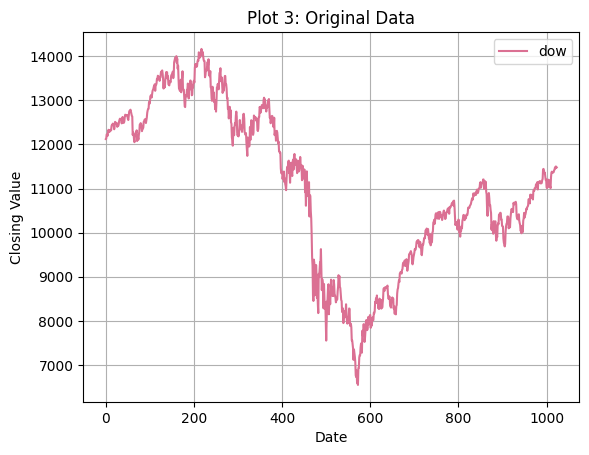

<Figure size 1500x1200 with 0 Axes>


The calculated Fourier coefficients have a length of 513, showing that there are 1024 samples since the expected array has to have N//2+1 complex numbers. 
The obtained array is plotted as


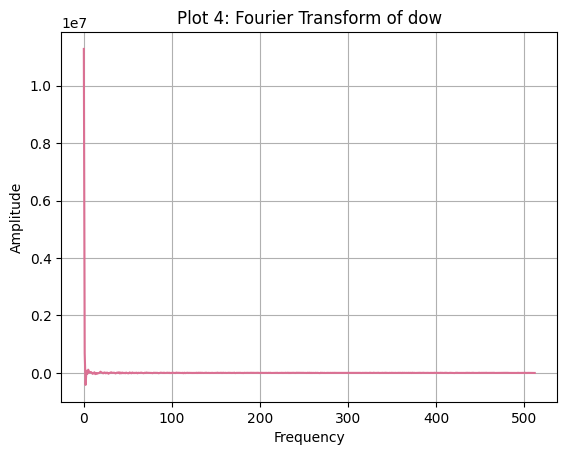


When the latter 90% of the data from dow is set to 0, the obtained plot is as follows:


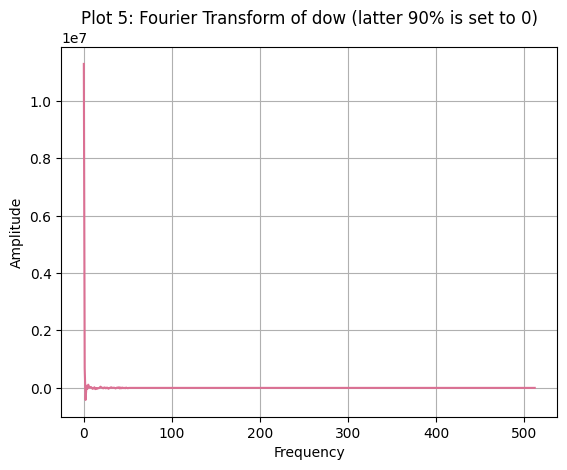


Setting the latter 90% of the coefficients to be zero and taking its inverse Fourier transform gives us the following plot:


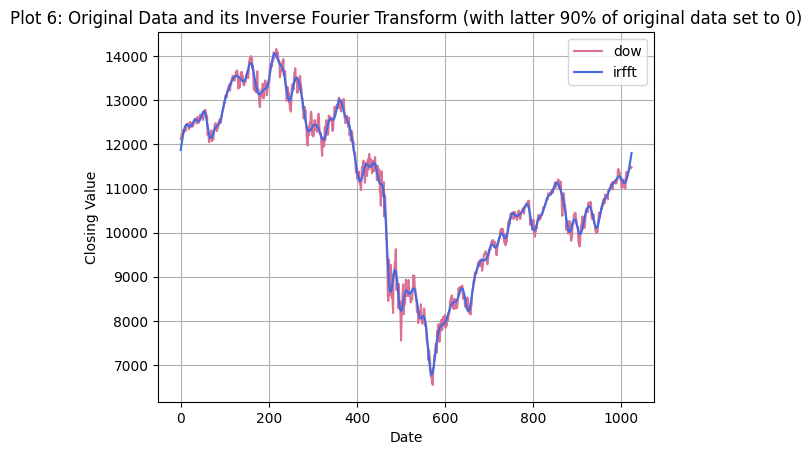

<Figure size 1500x1200 with 0 Axes>

Explanation of Plot 6:
Observing Plot 6, the plot of dow has more oscillation while the plot of the irfft is more smooth. Since the Fourier coefficients signify the 
frequency component in a signal, it can be concluded that setting most (90%) of the Fourier coefficients to 0 lessens the frequency of the signal 
(thus having less oscillation and longer wavelength). Moreover, by Nyquist theorem, the irfft signal is distorted and shows aliasing effects when 
compared to the original signal due to the low sampling rate (setting 90% of data to 0).


In [ ]:
import numpy as np
from numpy.fft import rfft, irfft
import matplotlib.pyplot as plt

#1:
print("Using that data from dow, we get the following plot:")
plt.plot(dow, color = "palevioletred", label = "dow") # plotting the given data from dow
plt.legend() # legend for plot
plt.title("Plot 3: Original Data") # plot title
plt.xlabel("Date") # label for x-axis
plt.ylabel("Closing Value") # label for y-axis
plt.grid() # adds grids to the plot
plt.figure(figsize=(15, 12)) # increases size of figure
plt.show() # displays plot
print("")

#2:
c_1 = rfft(dow) # discrete Fourier transform of dow using rfft
N = 2*(int(len(c_1)) - 1) # to calculate the number of samples (N), derived from the formula N//2+1 = len(c_1)
print(f"The calculated Fourier coefficients have a length of {len(c_1)}, showing that there are {N} samples since the expected array has to have N//2+1 complex numbers. \nThe obtained array is plotted as")
plt.plot(c_1, color = "palevioletred") # plots c_1
plt.title("Plot 4: Fourier Transform of dow") # plot title
plt.xlabel("Frequency") # label for x-axis
plt.ylabel("Amplitude") # label for y-axis
plt.grid() # adds grids to the plot
plt.show() # displays plot
print("")

#3:
print("When the latter 90% of the data from dow is set to 0, the obtained plot is as follows:")
n = len(c_1) # assigning n to have the length of c_1
c_1[int(n*0.1):] = 0 + 0j # setting the latter 90% of c_1 to be equal to 0
plt.plot(c_1, color = "palevioletred") # plots c_1
plt.title("Plot 5: Fourier Transform of dow (latter 90% is set to 0)") # plot title
plt.xlabel("Frequency") # label for x-axis
plt.ylabel("Amplitude") # label for y-axis
plt.grid() # adds grids to the plot
plt.show() # displays plot
print("")

#4:
print("Setting the latter 90% of the coefficients to be zero and taking its inverse Fourier transform gives us the following plot:")
c_2 = irfft(c_1) # inverse Fourier transform of c_1 (which is the Fourier transform of dow)
plt.plot(dow, color = "palevioletred", label = "dow") # plots the data from dow
plt.plot(c_2, color = "royalblue", label = "irfft") # plots c_2 (inverse Fourier transform of c_1)
plt.legend() # legend for plot
plt.title("Plot 6: Original Data and its Inverse Fourier Transform (with latter 90% of original data set to 0)") # plot title
plt.xlabel("Date") # label for x-axis
plt.ylabel("Closing Value") # label for y-axis
plt.grid() # adds grids to the plot
plt.figure(figsize=(15, 12)) # increases the size of figure
plt.show() # displays plot
print("Explanation of Plot 6:")
print("Observing Plot 6, the plot of dow has more oscillation while the plot of the irfft is more smooth. Since the Fourier coefficients signify the \nfrequency component in a signal, it can be concluded that setting most (90%) of the Fourier coefficients to 0 lessens the frequency of the signal \n(thus having less oscillation and longer wavelength). Moreover, by Nyquist theorem, the irfft signal is distorted and shows aliasing effects when \ncompared to the original signal due to the low sampling rate (setting 90% of data to 0).")

<font color=red>Correctness of Code: 35/35 </font> \
<font color=red>Discussion of Code and Results: 35/35 </font>